In [5]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
# File to Load (Remember to Change These)
file_to_load = "Output.csv"
# Read Purchasing File and store into Pandas data frame
geo_group_tech_Canada = pd.read_csv(file_to_load, low_memory=False)
geo_group_tech_Canada.head()

,Unnamed: 0,REF_DATE,GEO,Institution type,Credential type,Registration status,Sex,VALUE
0,96,1992/1993,Canada,"Total, institution type","Total, credential type","Total, registration status","Total, sex",52791.0
1,97,1992/1993,Canada,"Total, institution type","Total, credential type","Total, registration status",Males,34950.0
2,98,1992/1993,Canada,"Total, institution type","Total, credential type","Total, registration status",Females,17841.0
3,99,1992/1993,Canada,"Total, institution type","Total, credential type","Total, registration status",Sex unknown,NaN
4,100,1992/1993,Canada,"Total, institution type","Total, credential type",Full-time student,"Total, sex",38961.0


In [6]:
geo_group_tech_Canada = geo_group_tech_Canada[geo_group_tech_Canada["Institution type"].str.contains("Total,")==False]
geo_group_tech_Canada = geo_group_tech_Canada[geo_group_tech_Canada["Credential type"].str.contains("Total,")==False]
geo_group_tech_Canada = geo_group_tech_Canada[geo_group_tech_Canada["Registration status"].str.contains("Total,")==False]
geo_group_tech_Canada = geo_group_tech_Canada[geo_group_tech_Canada["Sex"].str.contains("Total,")==False]
geo_group_tech_Canada = geo_group_tech_Canada[geo_group_tech_Canada["Sex"].str.contains("Sex unknown")==False]
geo_group_tech_Canada.reset_index(drop=True).fillna(0).head()

,Unnamed: 0,REF_DATE,GEO,Institution type,Credential type,Registration status,Sex,VALUE
0,10182,1992/1993,Canada,University,Certificate,Full-time student,Males,240.0
1,10183,1992/1993,Canada,University,Certificate,Full-time student,Females,126.0
2,10185,1992/1993,Canada,University,Certificate,Part-time student,Males,1878.0
3,10186,1992/1993,Canada,University,Certificate,Part-time student,Females,1308.0
4,10328,1992/1993,Canada,University,Diploma,Full-time student,Males,48.0


In [7]:
geo_group_tech_Canada2 = geo_group_tech_Canada.groupby(["REF_DATE", "Institution type"]).sum().reset_index()
geo_group_tech_Canada2.head()

,REF_DATE,Institution type,Unnamed: 0,VALUE
0,1992/1993,College,2101036,41712.0
1,1992/1993,University,1734369,63891.0
2,1993/1994,College,15059134,41634.0
3,1993/1994,University,18028215,65220.0
4,1994/1995,College,28017232,42078.0


In [8]:
#Syntax: DataFrame.pivot(index=None, columns=None, values=None)[source]
# Minor Data Munging to Re-Format the Data Frames
geo_group_tech_Canada3 = geo_group_tech_Canada2.pivot(index ="Institution type", columns = "REF_DATE", values = "VALUE")
#geo_group_tech_Canada3.reset_index(level = None, inplace = True)
#Update columns and preview the Reformatting worked
geo_group_tech_Canada4 = geo_group_tech_Canada3.rename(columns={"1992/1993": "1993", "1993/1994": "1994","1994/1995": "1995", "1995/1996": "1996", "1996/1997": "1997", "1997/1998": "1998", "1998/1999": "1999","1999/2000": "2000", "2000/2001": "2001", "2001/2002": "2002", "2002/2003": "2003", "2003/2004": "2004","2004/2005": "2005","2005/2006": "2006","2006/2007": "2007", "2007/2008": "2008","2008/2009": "2009","2009/2010": "2010", "2010/2011": "2011", "2011/2012": "2012", "2012/2013": "2013", "2013/2014": "2014", "2014/2015": "2015", "2015/2016": "2016", "2016/2017": "2017" })
geo_group_tech_Canada4.head()

REF_DATE,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Institution type,,,,,,,,,,,,,,,,,,,,,
College,41712.0,41634.0,42078.0,44172.0,41958.0,50364.0,57576.0,61194.0,74094.0,74037.0,...,34344.0,31062.0,34824.0,35307.0,35814.0,37419.0,38871.0,40800.0,40305.0,47013.0
University,63891.0,65220.0,64917.0,64278.0,65250.0,68802.0,74949.0,82755.0,79752.0,86130.0,...,63894.0,64329.0,65202.0,67278.0,70593.0,76284.0,81714.0,89712.0,97143.0,107397.0


In [9]:
geo_group_tech_Canada10Y = geo_group_tech_Canada4[["2007","2008","2009","2010","2011","2012","2013", "2014", "2015", "2016", "2017"]]
geo_group_tech_Canada10Y

REF_DATE,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Institution type,,,,,,,,,,,
College,34701.0,34344.0,31062.0,34824.0,35307.0,35814.0,37419.0,38871.0,40800.0,40305.0,47013.0
University,66684.0,63894.0,64329.0,65202.0,67278.0,70593.0,76284.0,81714.0,89712.0,97143.0,107397.0


<Figure size 720x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

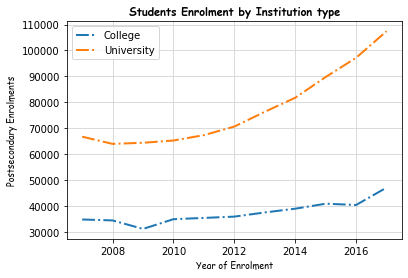

In [10]:
# Plot data into bar graph and label 
plt.figure(figsize = (10, 5))
plt.figure(facecolor=(1, 1, 0.1))
fig = plt.figure()

years=[]
for x in range(2007,2018):
    years.append(x)
x_axis = geo_group_tech_Canada10Y.loc["College"]
y_axis = geo_group_tech_Canada10Y.loc["University"]
college_axis = []
for x in x_axis: 
    college_axis.append(x)
university_axis = []
for y in y_axis: 
    university_axis.append(y)
plt.plot(years, college_axis, linestyle="-.", label="College", color="tab:blue", linewidth=2)
plt.plot(years, university_axis, linestyle="-.", label="University", color="tab:orange", linewidth=2)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.ylabel("Postsecondary Enrolments",fontsize="9", fontname="Comic Sans MS")
plt.xlabel("Year of Enrolment",fontsize="9", fontname="Comic Sans MS")
plt.title("Students Enrolment by Institution type",fontsize="11", fontweight='bold', fontname="Comic Sans MS")
plt.legend(loc="center")
plt.legend()
plt.savefig("Fig1.png")
plt.show()

In [11]:
geo_group_tech_Canada_sex = geo_group_tech_Canada.groupby(["REF_DATE", "Sex"]).sum().reset_index()
geo_group_tech_Canada_sex.head()

,REF_DATE,Sex,Unnamed: 0,VALUE
0,1992/1993,Females,1896504,35697.0
1,1992/1993,Males,1938901,69906.0
2,1993/1994,Females,16394178,35010.0
3,1993/1994,Males,16693171,71844.0
4,1994/1995,Females,30891852,33672.0


In [12]:
#Syntax: DataFrame.pivot(index=None, columns=None, values=None)[source]
# Minor Data Munging to Re-Format the Data Frames
geo_group_tech_Canada_sex2 = geo_group_tech_Canada_sex.pivot(index ="Sex", columns = "REF_DATE", values = "VALUE")
#geo_group_tech_Canada3.reset_index(level = None, inplace = True)
#Update columns and preview the Reformatting worked
geo_group_tech_Canada_sex2 = geo_group_tech_Canada_sex2.rename(columns={"1992/1993": "1993", "1993/1994": "1994","1994/1995": "1995", "1995/1996": "1996", "1996/1997": "1997", "1997/1998": "1998", "1998/1999": "1999","1999/2000": "2000", "2000/2001": "2001", "2001/2002": "2002", "2002/2003": "2003", "2003/2004": "2004","2004/2005": "2005","2005/2006": "2006","2006/2007": "2007", "2007/2008": "2008","2008/2009": "2009","2009/2010": "2010", "2010/2011": "2011", "2011/2012": "2012", "2012/2013": "2013", "2013/2014": "2014", "2014/2015": "2015", "2015/2016": "2016", "2016/2017": "2017" })
geo_group_tech_Canada_sex2 = geo_group_tech_Canada_sex2[["2007","2008","2009","2010","2011","2012","2013", "2014", "2015", "2016", "2017"]]
geo_group_tech_Canada_sex2.head()

REF_DATE,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Sex,,,,,,,,,,,
Females,27075.0,26283.0,25758.0,26736.0,26679.0,27705.0,29151.0,30735.0,33615.0,36531.0,41649.0
Males,74310.0,71955.0,69633.0,73290.0,75906.0,78702.0,84552.0,89850.0,96897.0,100917.0,112761.0


<Figure size 720x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

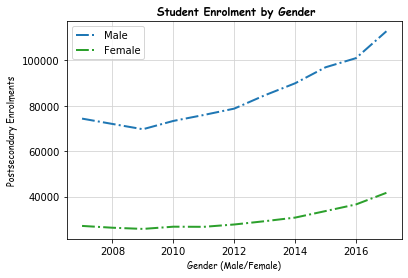

In [13]:
# Plot data into bar graph and label 
x_axis = geo_group_tech_Canada_sex2.loc["Females"]
y_axis = geo_group_tech_Canada_sex2.loc["Males"]

plt.figure(figsize = (10, 5))
plt.figure(facecolor=(1, 1, 0.1))
fig = plt.figure()
#fig.patch.set_facecolor("xkcd:light grey")

female_axis = []
for x in x_axis: 
    female_axis.append(x)
male_axis = []
for y in y_axis: 
    male_axis.append(y)
    
plt.plot(years, male_axis, linestyle="-.", label="Male", color="tab:blue", linewidth=2)
plt.plot(years, female_axis, linestyle="-.", label="Female", color="tab:green", linewidth=2)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.ylabel("Postsecondary Enrolments",fontsize="9", fontname="Comic Sans MS")
plt.xlabel("Gender (Male/Female)",fontsize="9", fontname="Comic Sans MS")
plt.title(" Student Enrolment by Gender",fontsize="11", fontweight='bold', fontname="Comic Sans MS")
plt.legend(loc="center")
plt.legend()
plt.savefig("Fig2.png")
plt.show()

In [14]:
#by Credential Type (not ploted)
geo_group_tech_Canada_Registration = geo_group_tech_Canada.groupby(["REF_DATE", "Registration status"]).sum().reset_index()
geo_group_tech_Canada_Registration.head()

,REF_DATE,Registration status,Unnamed: 0,VALUE
0,1992/1993,Full-time student,1953695,77928.0
1,1992/1993,Part-time student,1881710,27675.0
2,1993/1994,Full-time student,16836263,81222.0
3,1993/1994,Part-time student,16251086,25632.0
4,1994/1995,Full-time student,31718831,83334.0


In [15]:
#Syntax: DataFrame.pivot(index=None, columns=None, values=None)[source]
# Minor Data Munging to Re-Format the Data Frames
geo_group_tech_Canada_Registration2 = geo_group_tech_Canada_Registration.pivot(index ="Registration status", columns = "REF_DATE", values = "VALUE")
#geo_group_tech_Canada3.reset_index(level = None, inplace = True)
#Update columns and preview the Reformatting worked
geo_group_tech_Canada_Registration2 = geo_group_tech_Canada_Registration2.rename(columns={"1992/1993": "1993", "1993/1994": "1994","1994/1995": "1995", "1995/1996": "1996", "1996/1997": "1997", "1997/1998": "1998", "1998/1999": "1999","1999/2000": "2000", "2000/2001": "2001", "2001/2002": "2002", "2002/2003": "2003", "2003/2004": "2004","2004/2005": "2005","2005/2006": "2006","2006/2007": "2007", "2007/2008": "2008","2008/2009": "2009","2009/2010": "2010", "2010/2011": "2011", "2011/2012": "2012", "2012/2013": "2013", "2013/2014": "2014", "2014/2015": "2015", "2015/2016": "2016", "2016/2017": "2017" })
geo_group_tech_Canada_Registration2 = geo_group_tech_Canada_Registration2[["2007","2008","2009","2010","2011","2012","2013", "2014", "2015", "2016", "2017"]]
geo_group_tech_Canada_Registration2.head()

REF_DATE,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Registration status,,,,,,,,,,,
Full-time student,81012.0,78039.0,76335.0,79260.0,82554.0,85506.0,90969.0,96009.0,105291.0,113394.0,128073.0
Part-time student,20373.0,20199.0,19056.0,20766.0,20031.0,20901.0,22734.0,24576.0,25221.0,24054.0,26337.0
